# README.

This notebook shows how to do some very basic analysis of the measurements.

In [1]:
!cp /whhdata/dbconnection.json .

In [2]:
%matplotlib inline
import dbutils
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date
from time import mktime
import calendar
import time
import numpy as np
from IPython.display import display

# Where to store outputs.
output_path = "."

# Connect to database.
main_connector = dbutils.connect_to_main_database()

measurement_types = ["manual", "v0.1", "v0.2"]

# Simple analytics of database data.

In [3]:
main_connector = dbutils.connect_to_main_database()

sql_statement = "SELECT COUNT(*) FROM person;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "persons")

sql_statement = "SELECT COUNT(*) FROM measure;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "measures")

for measurement_type in measurement_types:
    sql_statement = "SELECT COUNT(*) FROM measure WHERE type='{}';".format(measurement_type)
    result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
    print(result, "measures with type {}".format(measurement_type))
    
sql_statement = "SELECT COUNT(*) FROM artifact;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifacts")

sql_statement = "SELECT COUNT(*) FROM artifact WHERE type='rgb';"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifacts with type rgb")

sql_statement = "SELECT COUNT(*) FROM artifact WHERE type='pcd';"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifacts with type pcd")

sql_statement = "SELECT COUNT(*) FROM artifact WHERE measure_id IS NOT NULL;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifacts with measure")

sql_statement = "SELECT COUNT(*) FROM artifact WHERE measure_id IS NULL;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifacts without measure")
    
sql_statement = "SELECT SUM(file_size) FROM artifact;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(int(result / (1024 * 1024 * 1024)), "GB artifacts data")

sql_statement = "SELECT SUM(file_size) FROM artifact WHERE type='rgb';"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(int(result / (1024 * 1024 * 1024)), "GB artifacts data with type rgb")
      
sql_statement = "SELECT SUM(file_size) FROM artifact WHERE type='pcd';"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(int(result / (1024 * 1024 * 1024)), "GB artifacts data with type pcd")

sql_statement = "SELECT COUNT(DISTINCT(qr_code)) FROM artifact;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "unique QR codes on artifact level")

sql_statement = "SELECT COUNT(DISTINCT(qr_code)) FROM artifact WHERE measure_id IS NULL;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "unique QR codes on artifact level without measure_id")

sql_statement = "SELECT COUNT(*) FROM artifact_quality;"
result = main_connector.execute(sql_statement, fetch_all=True)[0][0]
print(result, "artifact quality KPIs")

6990 persons
13739 measures
7028 measures with type manual
6192 measures with type v0.1
519 measures with type v0.2
966811 artifacts
743562 artifacts with type rgb
223249 artifacts with type pcd
630017 artifacts with measure
336794 artifacts without measure
378 GB artifacts data
80 GB artifacts data with type rgb
297 GB artifacts data with type pcd
5213 unique QR codes on artifact level
1853 unique QR codes on artifact level without measure_id
1179160 artifact quality KPIs


# Getting statistical values of measurements.

In [4]:
columns = [
 'age',
 'height',
 'weight',
 'muac',
 'head_circumference',
]

headers = []
rows = []
for column in columns:
    sql_statement = "SELECT MIN({0}), AVG({0}), MAX({0}) FROM measure WHERE type = 'manual' AND age > 0 AND age <10000;".format(column)
    minimum, average, maximum = main_connector.execute(sql_statement, fetch_one=True)
    
    rows.append([column, minimum, average, maximum])
    
headers = ("key", "minimum", "average", "maximum")
df = pd.DataFrame(rows, columns=headers)
df

,key,minimum,average,maximum
0,age,16.0000,1066.1235730593607306,2572.0
1,height,5.8000,84.904,997.9
2,weight,0.1075,10.8212,714.6
3,muac,0.0000,13.8543,170.0
4,head_circumference,4.4000,45.3295,446.0


# Creating pie charts for some columns.

('cgm11whh@gmail.com',) 2637
('cgm13whh@gmail.com',) 1340
('cgm10whh@gmail.com',) 1339
('cgm16whh@gmail.com',) 1274
('cgm2whh@gmail.com',) 1248
('cgm15whh@gmail.com',) 1185
('cgm14whh@gmail.com',) 1067
('cgm9whh@gmail.com',) 1003
('cgm12whh@gmail.com',) 697
('pushpa.paswan.fhf@gmail.com',) 635
('cgm1whhinnovation@gmail.com',) 465
('cgm8whh@gmail.com',) 455
('cgm7whh@gmail.com',) 312
('nan',) 67
('mmatiaschek@gmail.com',) 12
('cgm6whh@gmail.com',) 3
(False,) 13736
(True,) 3


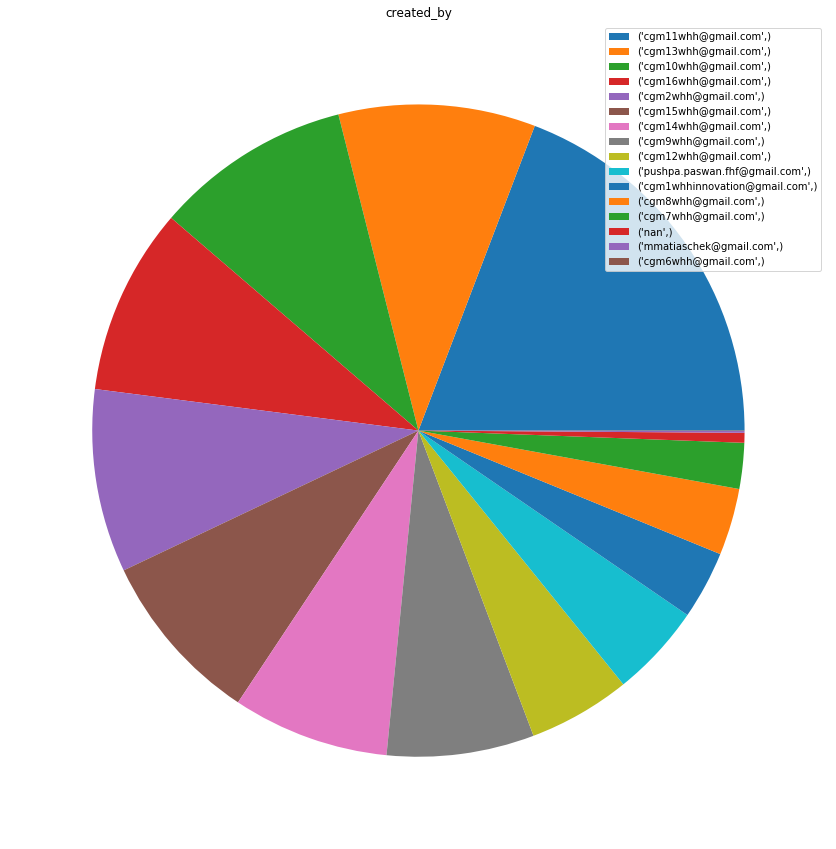

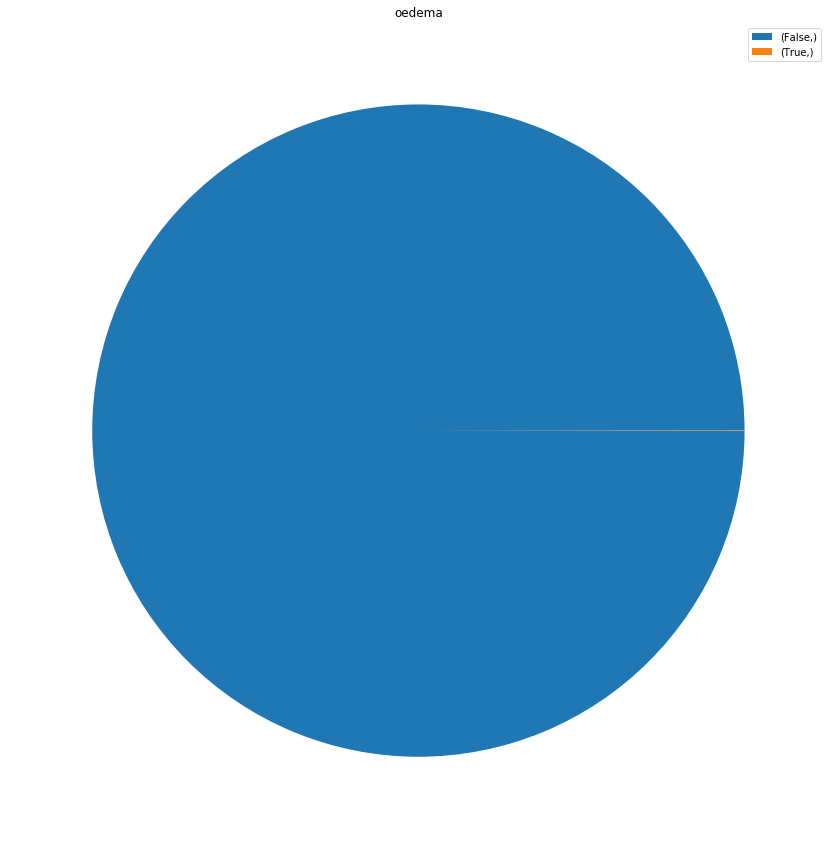

In [5]:
from collections import Counter

def make_pie(key):
    sql_statement = "SELECT {} FROM measure;".format(key)
    values_list = main_connector.execute(sql_statement, fetch_all=True)

    most_common = Counter(values_list).most_common(10000)

    # TODO percent
    values = []
    keys = []
    for key, value in most_common:
        print(key, value)
        keys.append(str(key))
        values.append(value)
        
    plt.figure(figsize=(15, 15))
    patches, texts = plt.pie(values)
    plt.legend(patches, keys)
    plt.title(df_key)
    plt.savefig(os.path.join(output_path, "pie-{}.png".format(df_key)))

    
df_keys = ["created_by", "oedema"]
for df_key in df_keys:
    make_pie(df_key)

# Render histograms.

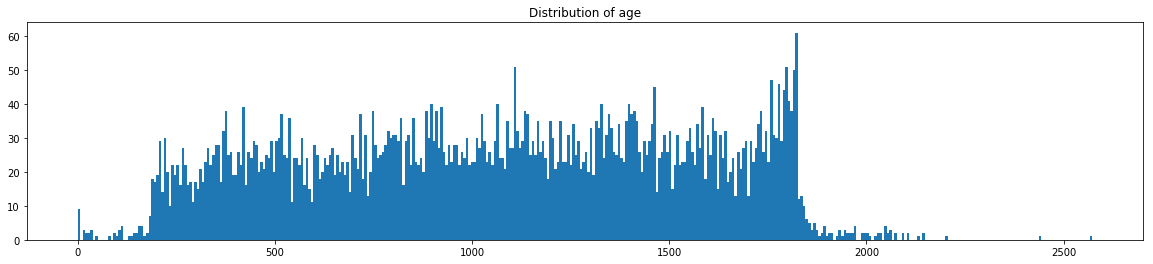

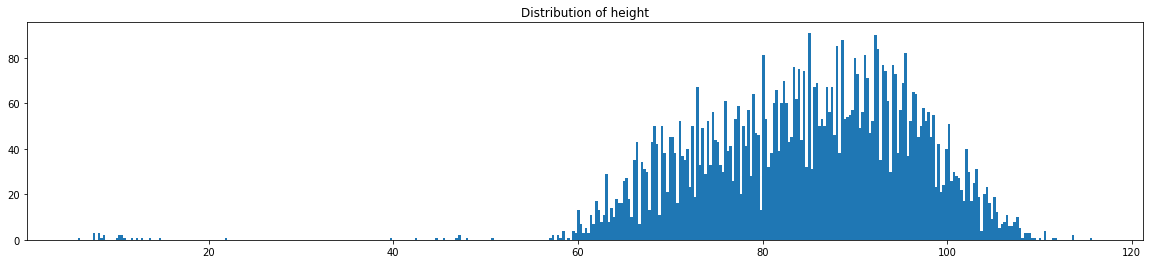

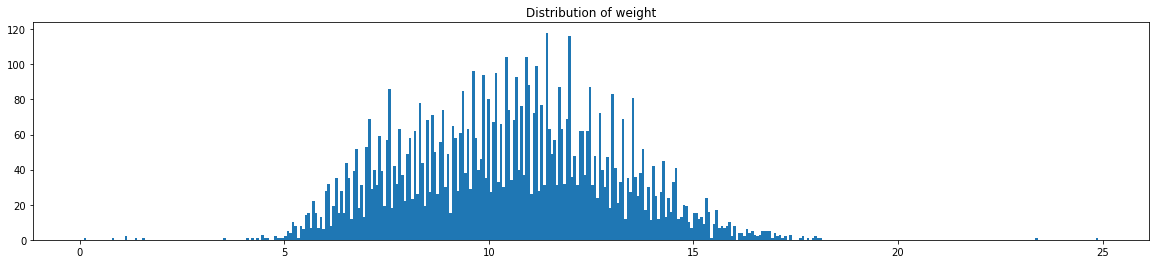

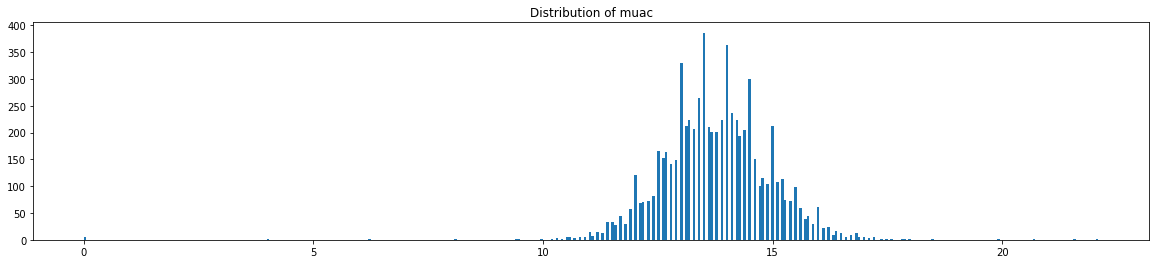

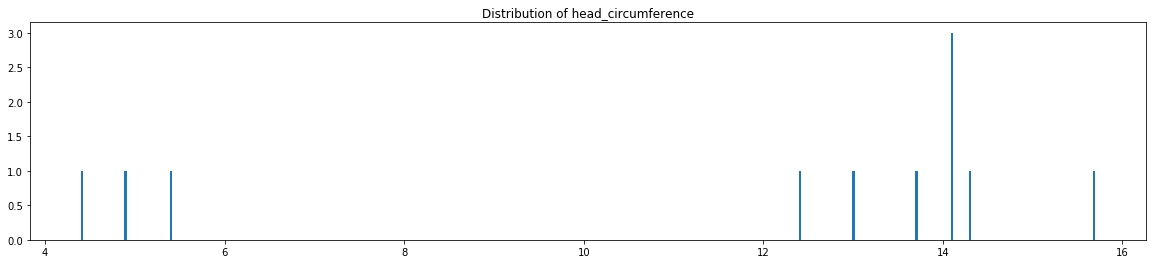

In [6]:
def render_histogram(key, values, bins, title):
    plt.figure(figsize=(20, 4))
    plt.hist(values, bins=bins)
    plt.title(title)
    plt.show()
    plt.close()
    
render_parameters = []
render_parameters.append(("age", 400, 3000))
render_parameters.append(("height", 400, 120))
render_parameters.append(("weight", 400, 30))
render_parameters.append(("muac", 400, 25))
render_parameters.append(("head_circumference", 400, 25))
for key, bins, maximum in render_parameters:
    sql_statement = "SELECT {} FROM measure WHERE type='manual' AND {}<{}".format(key, key, maximum)
    results = main_connector.execute(sql_statement, fetch_all=True)
    values = [result[0] for result in results]
    render_histogram(key, values, bins, "Distribution of {}".format(key))

# Render scatter plots.

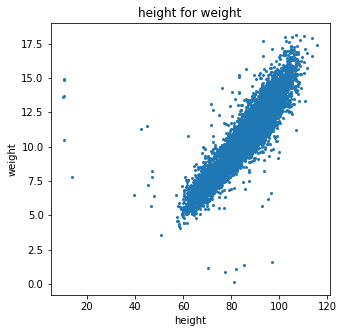

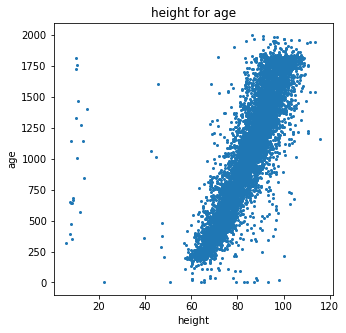

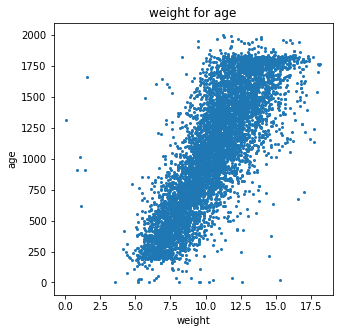

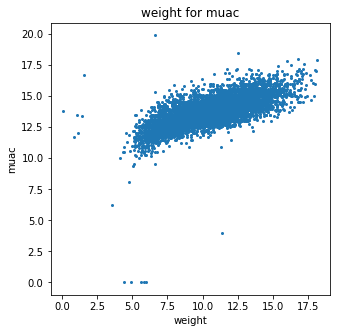

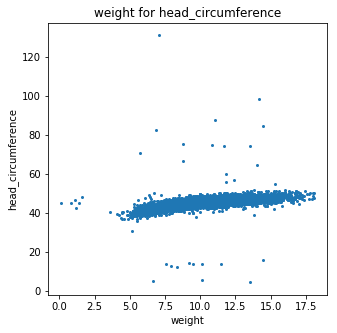

In [16]:
def render_scatterplot(key1, key2, x_values, y_values, title):
    plt.figure(figsize=(5, 5))
    plt.scatter(x_values, y_values, s=4)
    plt.xlabel(key1)
    plt.ylabel(key2)
    plt.title(title)
    plt.show()
    plt.close()
    
render_parameters = []
render_parameters.append(("height", "weight", 120, 20))
render_parameters.append(("height", "age", 120, 2000))
render_parameters.append(("weight", "age", 20, 2000))
render_parameters.append(("weight", "muac", 20, 20))
render_parameters.append(("weight", "head_circumference", 20, 200))
for key1, key2, maximum1, maximum2 in render_parameters:
    sql_statement = "SELECT {}, {} FROM measure WHERE type='manual'".format(key1, key2)
    sql_statement += " AND {}<{} AND {}<{}".format(key1, maximum1, key2, maximum2)
    results = main_connector.execute(sql_statement, fetch_all=True)
    results = np.array(results)
    x_values = results[:,0]
    y_values = results[:,1]
    render_scatterplot(key1, key2, x_values, y_values, "{} for {}".format(key1, key2))

# Specifying parameters.

In [8]:
time_range = []
for month in range(6, 13):
    time_range.append((2018, month))
for month in range(1, 6):
    time_range.append((2018, month))
    
figsize=(10, 5)

# Render measures.

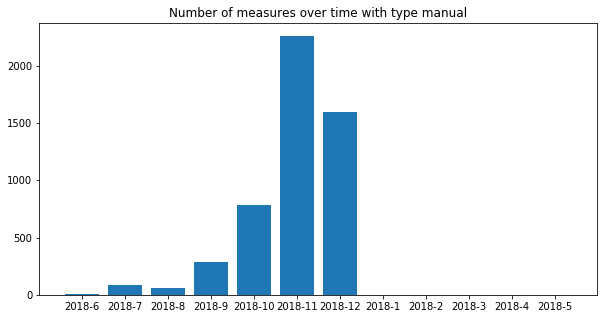

,Date,Count
0,2018-6,4
1,2018-7,88
2,2018-8,58
3,2018-9,287
4,2018-10,788
5,2018-11,2260
6,2018-12,1592
7,2018-1,0
8,2018-2,0
9,2018-3,0


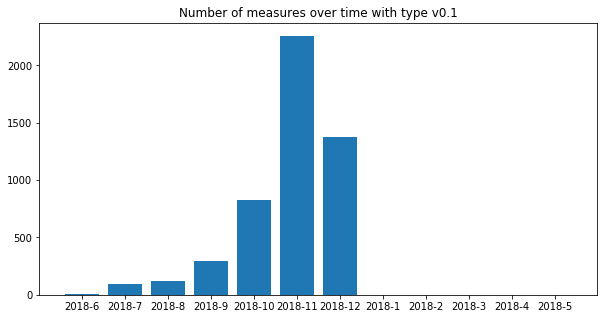

,Date,Count
0,2018-6,7
1,2018-7,94
2,2018-8,121
3,2018-9,294
4,2018-10,824
5,2018-11,2256
6,2018-12,1377
7,2018-1,0
8,2018-2,0
9,2018-3,0


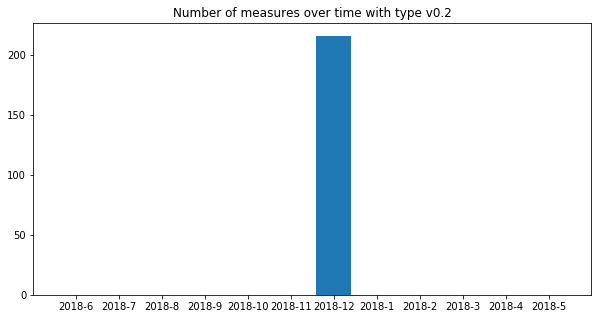

,Date,Count
0,2018-6,0
1,2018-7,0
2,2018-8,0
3,2018-9,0
4,2018-10,0
5,2018-11,0
6,2018-12,216
7,2018-1,0
8,2018-2,0
9,2018-3,0


In [9]:
for measurement_type in measurement_types:
    plot_values = []
    plot_labels = []
    for year, month in time_range:

        # Getting the start.
        start_day = 1
        start_date = date(year, month, start_day)
        start_timestamp = str(1000 * int(mktime(start_date.timetuple())))

        # Getting the end.
        _, end_day = calendar.monthrange(year, month)
        end_date = date(year, month, end_day)
        end_timestamp = str(1000 * int(mktime(end_date.timetuple())))

        # Getting the number of entries from the database.
        sql_statement = ""
        sql_statement += "SELECT COUNT(*) FROM measure"
        sql_statement += " WHERE type='{}'".format(measurement_type)
        sql_statement += " AND timestamp >= {}".format(start_timestamp)
        sql_statement += " AND timestamp <= {}".format(end_timestamp)
        number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]

        # Prepare the plot.
        plot_values.append(number_of_entries)
        plot_labels.append("{}-{}".format(year, month))

    # Plot the plot.
    plt.figure(figsize=figsize)
    plt.bar(plot_labels, plot_values)
    plt.title("Number of measures over time with type {}".format(measurement_type))
    plt.show()
    plt.close()
    
    rows = []
    for row_date, row_count in zip(plot_labels, plot_values):
        rows.append((row_date, row_count))
    
    headers = ("Date", "Count")
    df = pd.DataFrame(rows, columns=headers)
    display(df)

# Artifacts and artifacts without measure.

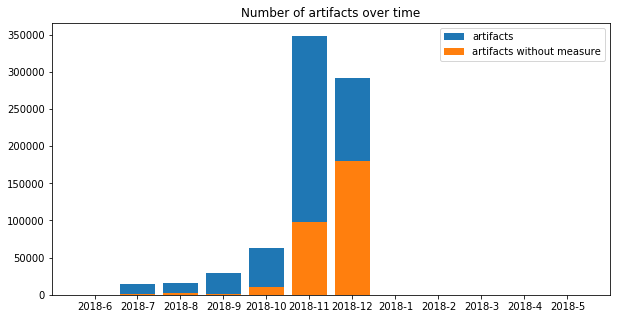

In [10]:
plot_values = []
plot_values_no_measure = []
plot_labels = []
for year, month in time_range:
        
    # Getting the start.
    start_day = 1
    start_date = date(year, month, start_day)
    start_timestamp = str(1000 * int(mktime(start_date.timetuple())))

    # Getting the end.
    _, end_day = calendar.monthrange(year, month)
    end_date = date(year, month, end_day)
    end_timestamp = str(1000 * int(mktime(end_date.timetuple())))

    # Getting the number of artifacts.
    sql_statement = ""
    sql_statement += "SELECT COUNT(*) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]
    plot_values.append(number_of_entries)

    # Getting the number of artifacts without measures.
    sql_statement = ""
    sql_statement += "SELECT COUNT(*) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    sql_statement += " AND measure_id IS NULL"
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]
    plot_values_no_measure.append(number_of_entries)

    plot_labels.append("{}-{}".format(year, month))
        
# Plot the plot.
plt.figure(figsize=figsize)
plt.bar(plot_labels, plot_values, label="artifacts")
plt.bar(plot_labels, plot_values_no_measure, label="artifacts without measure")
plt.legend()
plt.title("Number of artifacts over time")
plt.show()
plt.close()

# Available data in GBs.

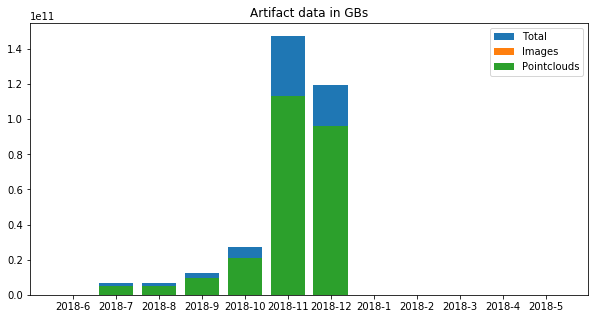

In [11]:
plot_values_total = []
plot_values_images = []
plot_values_pointclouds = []
plot_labels = []
for year, month in time_range:
        
    # Getting the start.
    start_day = 1
    start_date = date(year, month, start_day)
    start_timestamp = str(1000 * int(mktime(start_date.timetuple())))

    # Getting the end.
    _, end_day = calendar.monthrange(year, month)
    end_date = date(year, month, end_day)
    end_timestamp = str(1000 * int(mktime(end_date.timetuple())))

    # Getting the overall filesize.
    sql_statement = ""
    sql_statement += "SELECT SUM(file_size) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]
    if number_of_entries == None:
        number_of_entries = 0
    plot_values_total.append(number_of_entries)

    # Getting the overall filesize.
    sql_statement = ""
    sql_statement += "SELECT SUM(file_size) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    sql_statement += " AND type='pcd'"
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]
    if number_of_entries == None:
        number_of_entries = 0
    plot_values_pointclouds.append(number_of_entries)

    # Getting the overall filesize.
    sql_statement = ""
    sql_statement += "SELECT SUM(file_size) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    sql_statement += " AND type='rgb'"
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]
    if number_of_entries == None:
        number_of_entries = 0
    plot_values_images.append(number_of_entries)

    # Labels
    plot_labels.append("{}-{}".format(year, month))
        
# Plot the plot.
plt.figure(figsize=figsize)
plt.bar(plot_labels, plot_values_total, label="Total")
plt.bar(plot_labels, plot_values_images, label="Images")
plt.bar(plot_labels, plot_values_pointclouds, label="Pointclouds")
plt.legend()
plt.title("Artifact data in GBs")
plt.show()
plt.close()

# Number of QR codes on artifact level.

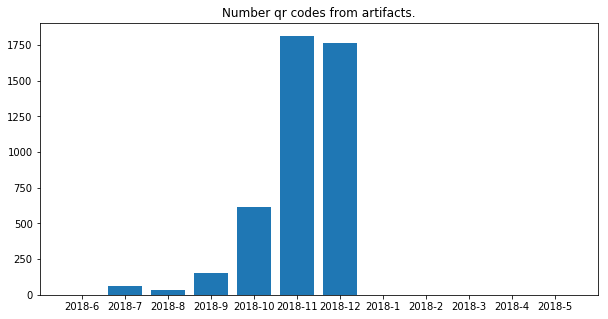

In [12]:
plot_values = []
plot_labels = []
for year, month in time_range:
        
    # Getting the start.
    start_day = 1
    start_date = date(year, month, start_day)
    start_timestamp = str(1000 * int(mktime(start_date.timetuple())))

    # Getting the end.
    _, end_day = calendar.monthrange(year, month)
    end_date = date(year, month, end_day)
    end_timestamp = str(1000 * int(mktime(end_date.timetuple())))

    # Getting the number of entries from the database.
    sql_statement = ""
    sql_statement += "SELECT COUNT(DISTINCT(qr_code)) FROM artifact"
    sql_statement += " WHERE create_date >= {}".format(start_timestamp)
    sql_statement += " AND create_date <= {}".format(end_timestamp)
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]

    # Prepare the plot.
    plot_values.append(number_of_entries)
    plot_labels.append("{}-{}".format(year, month))
        
# Plot the plot.
plt.figure(figsize=figsize)
plt.bar(plot_labels, plot_values)
plt.title("Number qr codes from artifacts.")
plt.show()
plt.close()

No handles with labels found to put in legend.


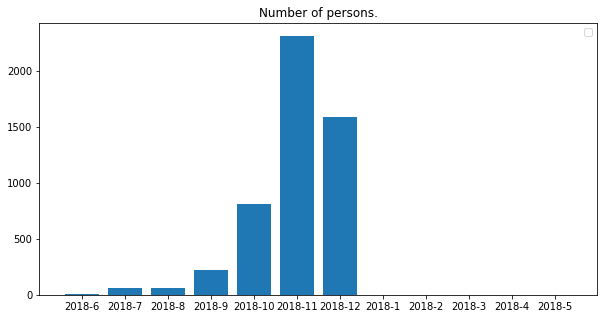

In [13]:
plot_values = []
plot_labels = []
for year, month in time_range:
        
    # Getting the start.
    start_day = 1
    start_date = date(year, month, start_day)
    start_timestamp = str(1000 * int(mktime(start_date.timetuple())))

    # Getting the end.
    _, end_day = calendar.monthrange(year, month)
    end_date = date(year, month, end_day)
    end_timestamp = str(1000 * int(mktime(end_date.timetuple())))

    # Getting the number of entries from the database.
    sql_statement = ""
    sql_statement += "SELECT COUNT(*) FROM person"
    sql_statement += " WHERE timestamp >= {}".format(start_timestamp)
    sql_statement += " AND timestamp <= {}".format(end_timestamp)
    number_of_entries = main_connector.execute(sql_statement, fetch_one=True)[0]

    # Prepare the plot.
    plot_values.append(number_of_entries)
    plot_labels.append("{}-{}".format(year, month))
        
# Plot the plot.
plt.figure(figsize=figsize)
plt.bar(plot_labels, plot_values)
plt.legend()
plt.title("Number of persons.")
plt.show()
plt.close()

# Just some numbers.

In [14]:
sql_statement = ""
sql_statement += "SELECT MIN(create_date), MAX(create_date) FROM artifact;"
min_create_date, max_create_date = main_connector.execute(sql_statement, fetch_one=True)

min_create_date = time.strftime("%a %d %b %Y %H:%M:%S GMT", time.gmtime(min_create_date / 1000.0))
print("First artifact:", min_create_date)

max_create_date = time.strftime("%a %d %b %Y %H:%M:%S GMT", time.gmtime(max_create_date / 1000.0))
print("Last artifact:", max_create_date)

First artifact: Fri 29 Jun 2018 10:40:28 GMT
Last artifact: Fri 08 Feb 2019 07:04:30 GMT


In [15]:
sql_statement = ""
sql_statement += "SELECT MIN(timestamp), MAX(timestamp) FROM measure;"
min_create_date, max_create_date = main_connector.execute(sql_statement, fetch_one=True)

min_create_date = time.strftime("%a %d %b %Y %H:%M:%S GMT", time.gmtime(min_create_date / 1000.0))
print("First measure:", min_create_date)

max_create_date = time.strftime("%a %d %b %Y %H:%M:%S GMT", time.gmtime(max_create_date / 1000.0))
print("Last measure:", max_create_date)

First measure: Thu 14 Jun 2018 07:30:14 GMT
Last measure: Mon 18 Mar 2019 09:40:45 GMT
